In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [22]:
# Display the first few rows of the dataset
print("Iris Dataset:")
df.head()

Iris Dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
# Feature and target selection
x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['species']

In [24]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [25]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [26]:
# Train the model using the training sets
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Predict the response for the test dataset
y_pred = clf.predict(x_test)

In [28]:
# Model Accuracy: How often is the classifier correct?
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [29]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


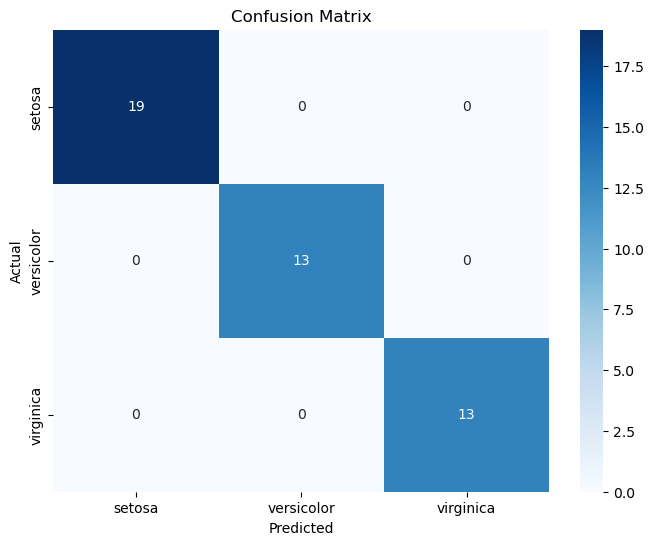

In [30]:
# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [32]:
# Predict for a new sample
new_sample = [[3, 5, 4, 2]]
predicted_species = clf.predict(new_sample)
print("\nPredicted species for the sample [3, 5, 4, 2]:", predicted_species[0])


Predicted species for the sample [3, 5, 4, 2]: versicolor


In [33]:
# Feature Importance
feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_imp)


Feature Importance:
petal width (cm)     0.433982
petal length (cm)    0.417308
sepal length (cm)    0.104105
sepal width (cm)     0.044605
dtype: float64


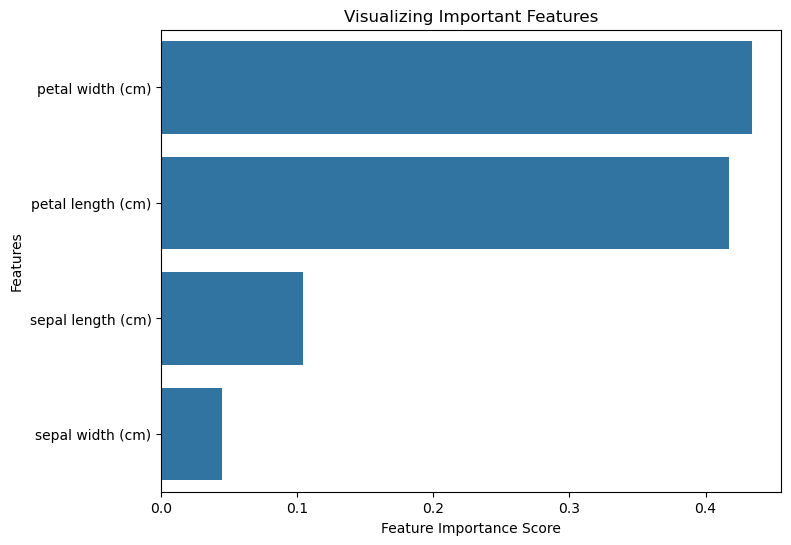

In [34]:
# Visualizing Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()